In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [18]:
size=0.105
path = f'rotation/Circle_{size}/u_trap_solutions_circle_fsolve.csv'

In [19]:
data = np.genfromtxt(path, delimiter=',')
data = data.T

In [20]:
# Rotation across z 
def Rz(theta):
    return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                      [ m.sin(theta), m.cos(theta) , 0 ],
                      [ 0           , 0            , 1 ]])

In [21]:
# Function for data rotation 
def rotate_data_across_z(data, theta):
    rotated_data = np.zeros((1000, 3))
    for i in range(data.shape[0]):
        rotated_data[i] = np.dot(Rz(theta), data[i])
    rotated_data[abs(0 - rotated_data) < 0.00000001] = 0 # too small values = 0 
    return rotated_data

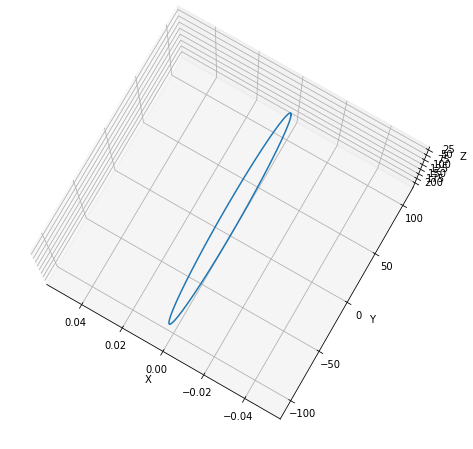

In [22]:
# Plot the rotated shape (can be confusing with small degrees because of the axes scaling)
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

ax.plot3D(data[:, 0], data[:, 1], data[:, 2])
ax.view_init(-100, 60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [23]:
# Rotate the shape (theta = angle)
theta = m.pi/2
a = rotate_data_across_z(data, theta)

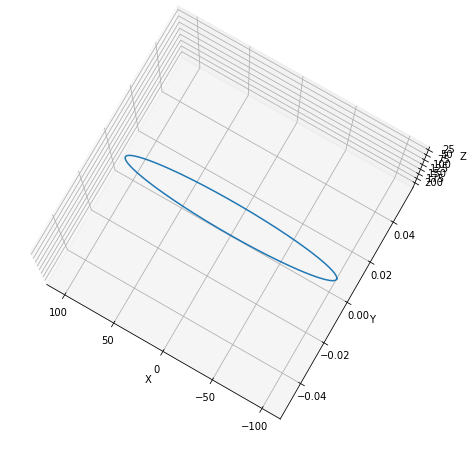

In [24]:
# Plot the rotated shape (can be confusing with small degrees because of the axes scaling)
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

ax.plot3D(a[:, 0], a[:, 1], a[:, 2])
ax.view_init(-100, 60)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## For loop for 360 shape rotations 

In [17]:
for i in range(360):
    theta = (m.pi / 180) * i
    new_data = rotate_data_across_z(data, theta)
    new_df = pd.DataFrame(new_data, columns=['x', 'y', 'z'])
    new_df.to_csv(f'rotation/Circle_{size}/data360/traps_{size}_{i}_degrees.csv', index=False)